# CONVNET Study Case
---

- **Notebook:** Julio César Martínez I.
- **Posición:** Data Scientist
- **Fecha:** 15-Ene-2024

# Apache Licence
---
Copyright [15-Ene-2024] [Julio César Martínez I.]

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.

# Introducción
---

Para este proyecto vamos a trabajar con un dataset que se llama **MNIST** que se compone de un total de 70,000 muestras de dígitos etiquetadas. Cada muestra es un dígito en blanco y negro de 28 x 28 píxeles y cada píxel es un valor de 0 a 255 representando la intensidad o sombra de ese píxel. La intención de este proyecto es construir una **Red Neuronal Convolucional** la cual nos devolverá una **Clasificación Probabilística**, es decir, para cada imágen del dígito el modelo nos devolverá un arreglo de 10 probabilidades, cada una índicando la posibilidad de que el dígito pertenesca a uno de los dígitos de 0 a 9 y la clase con la probabilidad más alta es el valor predicho.

# Librerías Requeridas
---

- pandas
- numpy
- scikit-learn
- tensorflow
- keras

# Tabla de Contenido

1. Cargar el Dataset

# Cargar el Dataset

Importando librerías y dataset **MNIST**

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(font_scale=2)

import numpy as np

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from IPython.display import Image

Cargando los datos en train y test

In [2]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

# Proyecto - COVNET

## Exploración de Datos

Inspeccionando tamaño del dataset

In [3]:
print('Conjunto de Entrenamiento:', X_train.shape)
print('Conjunto de Objetivo:', y_train.shape)

Conjunto de Entrenamiento: (60000, 28, 28)
Conjunto de Objetivo: (60000,)


In [4]:
print('Conjunto de Prueba:', X_test.shape)
print('Conjunto del Target de Prueba:', y_test.shape)

Conjunto de Prueba: (10000, 28, 28)
Conjunto del Target de Prueba: (10000,)


Visualizando digitos aleatorios

In [5]:
# imprimir 24 digitos aleatorios
indice = np.random.choice(
    np.arange(
        len(
            X_train
            )
        ),
    24,
    replace=False
    )
indice

array([48448, 18737, 59919, 55919,  4616, 41752, 37980, 56310, 33846,
       20722, 20238, 38064, 55713, 49256, 39609,  7614, 17517,  6582,
        6942,  6758, 56205, 33275, 56766, 10892])

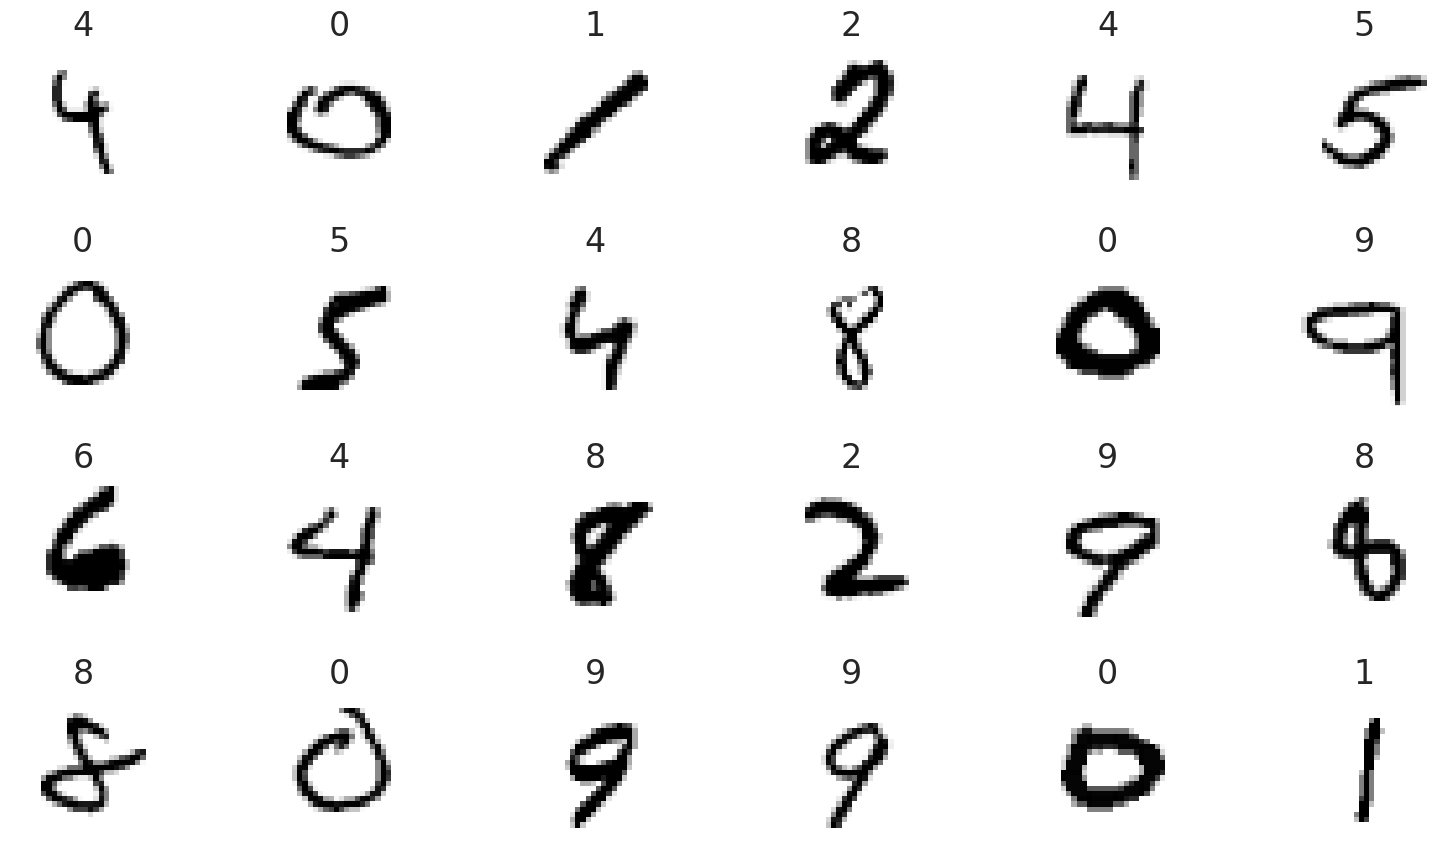

In [6]:
fig,ax=plt.subplots(nrows=4,ncols=6,figsize=(16,9))

for item in zip(ax.ravel(), X_train[indice], y_train[indice]):
  ax,image,target=item
  ax.imshow(image,cmap=plt.cm.gray_r)
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(target)
plt.tight_layout()

## Preparar Datos

Cambiando figura de Xtrain y Xtest

In [7]:
X_train = X_train.reshape((60000,28,28,1))
X_train.shape

(60000, 28, 28, 1)

In [8]:
X_test = X_test.reshape((10000,28,28,1))
X_test.shape

(10000, 28, 28, 1)

Normalizando los datos

In [9]:
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

Realizando one-hot encoding

In [10]:
y_train = to_categorical(y_train)
y_train.shape

(60000, 10)

In [11]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [12]:
y_test = to_categorical(y_test)
y_test.shape

(10000, 10)

In [13]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

## Creando Red Neuronal Convolucional

Instanciando modelo

In [14]:
cnn = Sequential()

In [15]:
cnn.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu", input_shape=(28,28,1)))

In [16]:
cnn.add(MaxPooling2D(pool_size=(2,2)))

In [17]:
cnn.add(Conv2D(filters=128,kernel_size=(3,3), activation="relu"))

In [18]:
cnn.add(MaxPooling2D(pool_size=(2,2)))

Aplicando aplanado de resultados

In [19]:
cnn.add(Flatten())

In [20]:
cnn.add(Dense(units=128, activation='relu'))

In [21]:
cnn.add(Dense(units=10, activation='softmax'))

Imprimir resultado

In [22]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 128)         0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 128)               4

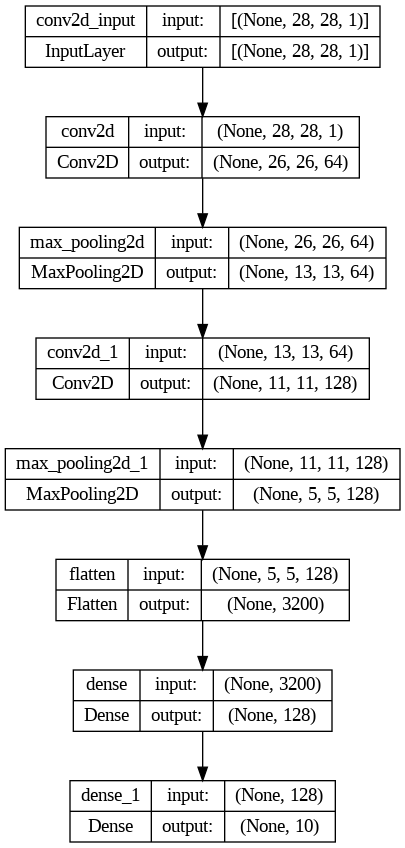

In [23]:
# --> estructura del modelo
plot_model(
    cnn,
    to_file="covnet.png",
    show_shapes=True,
    show_layer_names=True
    )
Image(filename="covnet.png")

In [24]:
# --> compilando modelo
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Entrenar y Evaluar el Modelo

Entrenando modelo con fit

In [25]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 105s 123ms/step - loss: 0.1422 - accuracy: 0.9563 - val_loss: 0.0444 - val_accuracy: 0.9867
Epoch 2/5
844/844 [==============================] - 105s 125ms/step - loss: 0.0428 - accuracy: 0.9870 - val_loss: 0.0418 - val_accuracy: 0.9858
Epoch 3/5
844/844 [==============================] - 106s 125ms/step - loss: 0.0306 - accuracy: 0.9905 - val_loss: 0.0398 - val_accuracy: 0.9892
Epoch 4/5
844/844 [==============================] - 100s 119ms/step - loss: 0.0205 - accuracy: 0.9933 - val_loss: 0.0363 - val_accuracy: 0.9902
Epoch 5/5
844/844 [==============================] - 101s 120ms/step - loss: 0.0156 - accuracy: 0.9946 - val_loss: 0.0383 - val_accuracy: 0.9910


Evaluando modelo

In [26]:
loss, acuracy = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 7s 21ms/step - loss: 0.0295 - accuracy: 0.9914


Hacer predicciones

In [27]:
predicciones = cnn.predict(X_test)

313/313 [==============================] - 5s 16ms/step


In [28]:
# --> elemento y_test
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [29]:
# --> elemento del modelo
for index, probability in enumerate(predicciones[0]):
  print(f'{index}: {probability:.10%}')

0: 0.0000000367%
1: 0.0000002604%
2: 0.0000049760%
3: 0.0000072519%
4: 0.0000000006%
5: 0.0000000001%
6: 0.0000000000%
7: 99.9999582767%
8: 0.0000000356%
9: 0.0000286870%


In [30]:
# --> predicciones incorrectas
images = X_test.reshape((10000,28,28))
incorrect_predictions=[]

for i, (p,e) in enumerate(zip(predicciones,y_test)):
  predicted, expected = np.argmax(p), np.argmax(e)

  if predicted != expected:
    incorrect_predictions.append((i, images[i], predicted, expected))

# --> longitud de lista
print('No de errores:', len(incorrect_predictions))

No de errores: 86


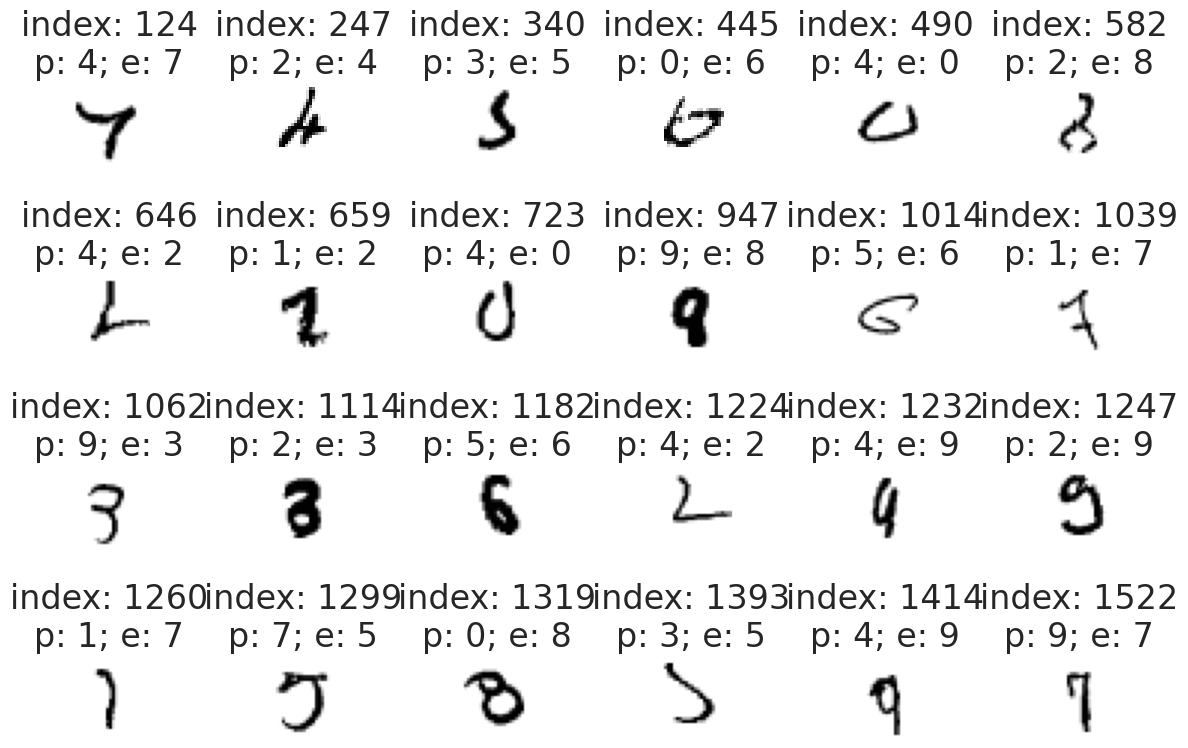

In [31]:
# --> visualizando predicciones incorrectas

fig, ax = plt.subplots(nrows=4, ncols=6, figsize=(12,8))

for ax, item in zip(ax.ravel(), incorrect_predictions):
  index, image, predicted, expected = item
  ax.imshow(image, cmap=plt.cm.gray_r)
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

In [32]:
# --> armar una función para un listado de probabilidades incorrectas

def muestraprob(prediction):
  for index, probability, in enumerate(prediction):
    print(f'{index}: {probability:.10%}')

In [33]:
# --> probabilidades incorrectas
muestraprob(predicciones[726])

0: 0.0000199747%
1: 0.0181006588%
2: 0.0066296045%
3: 0.0414720940%
4: 1.9611639902%
5: 1.2134419754%
6: 0.0002223435%
7: 96.7555642128%
8: 0.0000294807%
9: 0.0033476881%


# Conclusiones

Después de pasar un tiempo entrenando y probando nuestra red convolucional llegamos a las siguientes conclusiones:

- Se pueden observar toda la gama de números que tienen errores, por ejemplo, en el primer número el modelo predijo un 3 pero en realidad esperábamos un 5. El mismo caso se aplica para el último número el cual el modelo predijo un 2 pero en realidad esperába un 1. De esta manera podemos darnos cuenta que incluso para nosotros como seres humanos nos es difícil también reconocer algunos números.
- La red convolucional se entrenó con al menos 5 epochs.
- Se obtuvieron 79 errores en las predicciones del modelo.
- El modelo funciona con el 99.9% de exactitud y se dejó al menos un 10% para datos de validación.
- Para este modelo se utilizaron 3 capas de convoluciones y 3 capas de Flatten.